#1.- Create a database with all cities and towns from Catalonia

As the project focuses on a database of news from diferent newspapers from Catalonia, the database will contain every town and city of Catalonia. This information will be extracted from a database given by the "Institut Cartogràfic de Catalunya".

In [300]:
#All imports for Catalan DB
from pymongo import MongoClient
import xlrd
from collections import OrderedDict
import simplejson as json
import utm

In [301]:
''' Initialize a MongoDB instance '''
def get_db_ciutats():
    client = MongoClient('localhost:27017')
    db = client.ciutats
    return db

def add_city_db(db, name, tipus, lat, lon):
    db.ciutats.insert({"name":name, "tipus":tipus,"lat":lat, "lon":lon})

In [603]:
''' Initialize all catalan cities database '''
def ini_Catalan_cities():
    print "Loading file..."
    # Open the workbook and select the first worksheet
    wb = xlrd.open_workbook('CartoCat.xlsx')
    sh = wb.sheet_by_index(0)
    print "File loaded correctly."
    db = get_db_ciutats()
    db.ciutats.remove()
    print "Conversio iniciada"
    # Iterate through each row in worksheet and fetch values into dict
    for rownum in range(1, sh.nrows):
        item = OrderedDict()
        row_values = sh.row_values(rownum)
        item['nom'] = row_values[0].replace('*','').split(',')[0].strip()
        item['tipus'] = row_values[1]
        #item['municipi'] = row_values[2]
        #item['comarca'] = row_values[6]
        item['utmX'] = row_values[15]
        item['utmY'] = row_values[16]
        #if item['tipus']!= 'cap':
        #    continue
        if item['utmX']==0.0 or item['utmY']==0.0:
            continue
        #if db.ciutats.find({'name':item['nom']}).count()>0:
            #continue
        u = utm.to_latlon(item['utmX'],item['utmY'], 31, 'T')
        item['lat'] = u[0]
        item['lon'] = u[1]
        add_city_db(db,item['nom'],item['tipus'],item['lat'],item['lon'])
    print "Conversio finalitzada"
    print "Elements in db.ciutats: " , db.ciutats.count()

def find_name_origin(sample_text):
    print "Loading file..."
    # Open the workbook and select the first worksheet
    wb = xlrd.open_workbook('CartoCat.xlsx')
    sh = wb.sheet_by_index(0)
    print "File loaded correctly."
    # Iterate through each row in worksheet and fetch values into dict
    for rownum in range(1, sh.nrows):
        item = OrderedDict()
        row_values = sh.row_values(rownum)
        item['nom'] = row_values[0].replace('*','')
        
        item['tipus'] = row_values[1]
        if("l'" in item['nom'] and item["tipus"]=='cap'): print item['nom']
        #item['municipi'] = row_values[2]
        #item['comarca'] = row_values[6]
        item['utmX'] = row_values[15]
        item['utmY'] = row_values[16]
        
    print "Conversio finalitzada"
    print "Elements in db.ciutats: " , db.ciutats.count()

In [604]:
find_name_origin('')

Loading file...
File loaded correctly.
Abella, l'
Albagés, l'
Albi, l'
Albiol, l'
Aldea, l'
Aleixar, l'
Ametlla del Vallès, l'
Ametlla de Mar, l'
Ampolla, l'
Arboç, l'
Argentera, l'
Armentera, l'
Castell de l'Areny
Escala, l'
Espluga Calba, l'
Espluga de Francolí, l'
Espunyola, l'
Estany, l'
Hospitalet de Llobregat, l'
Hostalnou de Bianya, l'
Sant Sadurní de l'Heura
Torre de l'Espanyol, la
Vilanova de l'Aguda
Conversio finalitzada
Elements in db.ciutats:  52698


In [321]:
# Create the first database, the one containing all Catalan cities
# The following code should be executed once, so to prevent accidental execution and because of the long time
# the code lasts it is commented:

#ini_Catalan_cities()

Loading file...
File loaded correctly.
Conversio iniciada
Conversio finalitzada
Elements in db.ciutats:  52698


## Query example
Example of how a MongoDB can be queried to find an item by a key.

In [584]:
# Get the information related to my town: Calaf
db = get_db_ciutats()
poble = db.ciutats.find({'name':'Hospitalet de Llobregat'})
for a in poble:
    print a, a['lat'], a['lon']

{u'lat': 41.362616015751925, u'_id': ObjectId('558c015b3660440af77094ff'), u'lon': 2.103292928296512, u'name': u'Hospitalet de Llobregat', u'tipus': u'cap'} 41.3626160158 2.1032929283


##Save names to file catalan_city_names.txt

In [402]:
# Get the full list of towns and cities in Catalonia. There are currently 947 towns in Catalonia, so we expect
# a list of towns as long as that.
db = get_db_ciutats()
db.ciutats.find().count()
ciut = db.ciutats.find({'tipus':'cap'})
print "Number of cities found:", ciut.count()
catalonia_city_names = []
for a in ciut:
    #print a['name']
    catalonia_city_names.append(a['name'])
def save_catalonia_names_file():
    with open('catalan_city_names.txt', 'a') as the_file:
        for a in catalonia_city_names:
            print a
            the_file.write(a.encode('utf-8')+"\n")
save_catalonia_names_file()

Number of cities found: 947
Abella
Abella de la Conca
Abrera
Àger
Agramunt
Aguilar de Segarra
Agullana
Aiguafreda
Aiguaviva
Aitona
Alamús
Alàs
Albagés
Albanyà
Albatàrrec
Albesa
Albi
Albinyana
Albiol
Albons
Alcanar
Alcanó
Alcarràs
Alcoletge
Alcover
Aldea
Aldover
Aleixar
Alella
Alfara de Carles
Alfarràs
Alfés
Alforja
Algerri
Alguaire
Alins
Alió
All
Almacelles
Almatret
Almenar
Almoster
Alòs de Balaguer
Alp
Alpens
Alpicat
Altafulla
Amer
Ametlla del Vallès
Ametlla de Mar
Ampolla
Amposta
Anglès
Anglesola
Anserall
Ansovell
Arbeca
Arboç
Arbolí
Arbúcies
Arenys de Mar
Arenys de Munt
Argelaguer
Argençola
Argentera
Argentona
Armentera
Arnes
Arres de Jos
Arsèguel
Artés
Artesa de Lleida
Artesa de Segre
Ascó
Aspa
Avellanes
Avià
Avinyó
Avinyonet de Puigventós
Avinyó Nou
Badalona
Badia del Vallès
Bagà
Balaguer
Balsareny
Banyeres del Penedès
Banyoles
Barbens
Barberà de la Conca
Barberà del Vallès
Barcelona
Barruera
Bàscara
Bassella
Batea
Bausen
Begues
Begur
Belianes
Bellaguarda
Bellcaire d'Empordà
Bellc

## Important functions to make this notebook work

Function | What does?
--- | ---
get_db_ciutats() | returns the database that contains cities
add_city_db(db, name, tipus, lat, lon) | adds a city with the specified name and coordinates to db
ini_catalan_cities() | creates a mongod database with all cities from a given data set

Variables at this point

Variable | What contains
--- | ---
catalonia_city_names | contains the names of all cities in Catalonia

## Types of elements in the database

The main elements that can be found among other less important are the following:

Abbreviature | Meaning
---    |   ---
'cap'  | Cap de municipi
'barri'| Barri, sector urbà (+50.000 hab.)
'nucli'| Nucli de població (poble, llogaret...)
'diss.'| Veïnat disseminat
'e.m.d.'| Entitat municipal descentralitzada
mun. | Nom del municipi quan aquest no coincideix amb la capital
edif. | Edificació aïllada
edif. hist. | Edifici històric (ermita, església, castell...)


In [371]:
db.ciutats.count()

52698

# 2. Add to the database some important international cities

# SPARQL approximation
To achieve this objective, I will be using SPARQL language, that let obtain information from for example DBPEDIA, a database containing information extracted from the WIKIPEDIA.

To obtain references from all towns in Catalonia, I will set a filter with the following coordinates: latitude between 40.5 and 42.5, and longitude between 0.5 and 2.7.
I could use also the filter that would only show results from Spain setting the dbpedia-owl:country to <http://dbpedia.org/resource/Spain>, but not all cities from DBPedia are correctly categorized.

In [47]:
import json
#NOT WORKING
def sparql_cities():
    from SPARQLWrapper import SPARQLWrapper, JSON
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    sparql.setReturnFormat(JSON)

    sparql.setQuery("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX yago: <http://dbpedia.org/class/yago/>
    PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>

    SELECT ?title ?geolat ?geolong
        WHERE {
            #?place rdf:type <http://dbpedia.org/ontology/Place> .
            #?place dbpedia-owl:country <http://dbpedia.org/resource/Spain> .
            ?place foaf:name ?title .
            ?place geo:lat ?geolat .
            ?place geo:long ?geolong .
            FILTER ((?geolong > 0.5 && ?geolong < 2.7) && (?geolat < 42.5 && ?geolat > 40.5))
            #FILTER (LANG(?title)='ca')
        }
    """)
    return sparql.query().convert()
for res in sparql_cities()["results"]["bindings"]:
    print res["title"]["value"], res["geolat"]["value"], res["geolong"]["value"]

Isábena/Isàvena 	42.31 	0.527
Tivenys 	40.9094 	0.513333
Flix 	41.2292 	0.541667
Tortosa 	40.8128 	0.523333
Serra del Montsià 	40.6239 	0.544722
Montsià 	40.7 	0.566667
Ribagorza/Ribagorça 	42.45 	0.533333
Ascó Nuclear Power Plant 	41.2 	0.569444
Central nuclear de Ascó 	41.2 	0.569444
Taifa of Tortosa 	40.8128 	0.519167
Molacima 	40.6075 	0.525278
Baix Ebre 	40.85 	0.555278
Alcanar 	40.5953 	0.570556
Alcarràs 	41.5661 	0.526111
La Sotonera, Spain 	42.238 	0.542
Lleida–Alguaire Airport 	41.7278 	0.535833
Aeroport de Lleida-Alguaire 	41.7278 	0.535833
Lascuarre/Lasquarri 	42.2 	0.516667
La Foradada (Montsià) 	40.63 	0.541111
Battle of Almenar 	41.7958 	0.568889
Benifallet 	40.975 	0.516667
El Pinell de Brai 	41.0172 	0.515556
Maials 	41.3658 	0.505278
Alfarràs 	41.8328 	0.572222
Ascó 	41.1833 	0.566667
Tortosa 	40.8137 	0.521558
Dioecesis Dertosensis 	40.8137 	0.521558
Diòcesi de Tortosa (Catalan) 	40.8137 	0.521558
Diócesis de Tortosa (Spanish) 	40.8137 	0.521558
Estopiñán del Castillo

As you can see in the example above, the names of the cities contain different formatting, so it is really difficult to use it in this project. Some names contain the name in catalan and in spanish, others have a word describing the country where it belongs, or the zone,... From that, it is really difficult to determine all the things that should be done to leave the name in a proper way.

# Using the .txt dump database from GEONAMES.ORG

As the idea of using SPARQL is not the best one regarding this project, I will make use of the dump of the database from geonames.org which contains the most important cities with more than 15.000 inhabitants. To work with this database, I will parse the information because it is in a .txt file, and I will save it as a json file.

The data format is tab-delimited text in utf8 encoding.
There are two important files. cities15000 and alternate names. I will combine both files in order to get information about a city (cities15000) and get its current name in Catalan (alternateNames).


Files | Description
---|---
cities15000.zip          | all cities with a population > 15000 or capitals (ca 20.000), see 'geoname' table for columns
alternateNames.zip       | alternate names with language codes and geonameId, file with iso language codes

The table '<strong>geoname</strong>'  :
-----------------------------------------

Name | Description
---|---
geonameid         | integer id of record in geonames database
name              | name of geographical point (utf8) varchar(200)
asciiname         | name of geographical point in plain ascii characters, varchar(200)
alternatenames    | alternatenames, comma separated, ascii names automatically transliterated, convenience attribute from alternatename table, varchar(10000)
latitude          | latitude in decimal degrees (wgs84)
longitude         | longitude in decimal degrees (wgs84)
feature class     | see http://www.geonames.org/export/codes.html, char(1)
feature code      | see http://www.geonames.org/export/codes.html, varchar(10)
country code      | ISO-3166 2-letter country code, 2 characters
cc2               | alternate country codes, comma separated, ISO-3166 2-letter country code, 200 characters
admin1 code       | fipscode (subject to change to iso code), see exceptions below, see file admin1Codes.txt for display names of this code; varchar(20)
admin2 code       | code for the second administrative division, a county in the US, see file admin2Codes.txt; varchar(80) 
admin3 code       | code for third level administrative division, varchar(20)
admin4 code       | code for fourth level administrative division, varchar(20)
population        | bigint (8 byte int) 
elevation         | in meters, integer
dem               | digital elevation model, srtm3 or gtopo30, average elevation of 3''x3'' (ca 90mx90m) or 30''x30'' (ca 900mx900m) area in meters, integer. srtm processed by cgiar/ciat.
timezone          | the timezone id (see file timeZone.txt) varchar(40)
modification date | date of last modification in yyyy-MM-dd format


AdminCodes:
Most adm1 are FIPS codes. ISO codes are used for US, CH, BE and ME. UK and Greece are using an additional level between country and fips code. The code '00' stands for general features 
where no specific adm1 code is defined.



The table 'alternate names' :
-------------------------------
Name | Description
---|---
alternateNameId   | the id of this alternate name, int
geonameid         | geonameId referring to id in table 'geoname', int
isolanguage       | iso 639 language code 2- or 3-characters; 4-characters 'post' for postal codes and 'iata','icao' and faac for airport codes, fr_1793 for French Revolution names,  abbr for abbreviation, link for a website, varchar(7)
alternate name    | alternate name or name variant, varchar(200)
isPreferredName   | '1', if this alternate name is an official/preferred name
isShortName       | '1', if this is a short name like 'California' for 'State of California'
isColloquial      | '1', if this alternate name is a colloquial or slang term
isHistoric        | '1', if this alternate name is historic and was used in the past

Remark : the field 'alternatenames' in the table 'geoname' is a short version of the 'alternatenames' table without links and postal codes but with ascii transliterations. You probably don't need both. 
If you don't need to know the language of a name variant, the field 'alternatenames' will be sufficient. If you need to know the language
of a name variant, then you will need to load the table 'alternatenames' and you can drop the column in the geoname table.



Statistics on the number of features per country and the feature class and code distributions : http://www.geonames.org/statistics/ 


Continent name | code
--- | ---
AF : Africa		|	geonameId=6255146
AS : Asia		|	geonameId=6255147
EU : Europe		|	geonameId=6255148
NA : North America	|	geonameId=6255149
OC : Oceania	|		geonameId=6255151
SA : South America	|	geonameId=6255150
AN : Antarctica	|		geonameId=6255152

In [325]:
import re, zipfile, os, json

''' list of all names in catalan of cities around the world '''
def get_names_cat():
    list_all_names_cities = dict()
    all_n = open('alternateNames.txt')
    for a in all_n:
        t = re.split('\t+?',a)
        if t[2]=='cat' or t[2] == 'ca':
            list_all_names_cities[t[1]]=[t[0],t[2],t[3]]
    with open('JSON/names.json', 'w') as fp:
        json.dump(list_all_names_cities, fp)
    return list_all_names_cities



''' returns the file specified ready to operate '''
def get_file(file_name):
        f = open(file_name)
        return f

''' parses the information given and returns a list with the parameters correctly sorted '''
def to_list(f):
    list_cities = []
    t = []
    for it in f:
        t = re.split('\t+?',it)
        a = [t[0],t[1],t[2],t[3].split(','), t[4], t[5],t[14]]# 14th value relates to population
        list_cities.append(a)
    return list_cities



url = 'http://download.geonames.org/export/dump/'

file1 = 'cities15000.txt'  
file3 = 'countryInfo.txt'

fcities = get_file(file1)
fcountries = get_file(file3) #obtain countries dict

list_cities = to_list(fcities)
list_countries = to_list(fcountries)
list_all_names_cities = get_names_cat()
#print(list1)


filter_cities = (
    ('name',        2),
    ('longitude',   4),
    ('latitude',    5),
    ('population', 14)
    )

filter_countries=(
    ('code',    0),
    ('name',    4),
    ('population',    7),
    ('continent',    8)
    )

# all json files related to this step will be stored in a folder called JSON
json_dir = os.path.dirname(os.path.abspath('__file__'))+'/JSON'

cities  =   {'cities':list_cities}  
countries = {'countries':list_countries}

def to_json_file(data, output):
    if not os.path.isdir(json_dir):
        os.makedirs(json_dir)
    with open(os.path.join(json_dir,output)+'.json', 'w') as file:
        file.write(json.dumps(data, file, indent=4))



In [327]:
# code commented because the files are already created
to_json_file(cities, 'cities')
to_json_file(countries, 'countries')

Now we have 3 json files with information about all cities, their name in catalan, and information about the country where they are placed. We put all this information together in a single file.

In [328]:
ciutats = json.loads(open("JSON/cities.json").read())
paisos = json.loads(open("JSON/countries.json").read()) # contains information about the country where a city belongs to
noms = json.loads(open("JSON/names.json").read())

In [329]:
#ciutats['cities'][0]
#paisos['countries'][0]
#print noms['3040051']

def test_noms():
    for nm in noms:
        noms[nm][2]=noms[nm][2].replace('Districte de','').replace("Districte d'",'').replace("Districte d",'').replace('Districte administratiu de','')
        noms[nm][2]=noms[nm][2].replace('Estat de','').replace("Estat d'",'').replace("Estat d",'')
        noms[nm][2]=noms[nm][2].replace('Ciutat de','').replace("Ciutat d'",'').replace("Ciutat d",'')
        if('Estat d' in noms[nm][2]):
            print 'estat:',noms[nm][2]
        if('Ciutat' in noms[nm][2]):
            print 'ciutat:',noms[nm][2]
        if('cap' in noms[nm][2]):
            print 'Districte:',noms[nm][2]
    print 'cit:',ciutats['cities'][0]
complete_duplicate_set = []
def find_duplicates():
    import collections
    noms_list=[]
    for a in noms:
        noms_list.append(noms[a][2])
    complete_duplicate_set = [item for item, count in collections.Counter(noms_list).items() if count > 1]
    print "total:" ,len(complete_duplicate_set)


find_duplicates()
test_noms()

total: 352
ciutat: La Ciutat
ciutat: Ciutat Vella de Barcelona
ciutat: Ciutat Nova dEdimburg
Districte: Acapulco
ciutat: Ciutat Ho Chi Minh
Districte: Balaguer, capital de la Noguera
cit: [u'3040051', u'les Escaldes', u'les Escaldes', [u"Ehskal'des-Ehndzhordani", u'Escaldes', u'Escaldes-Engordany', u'Les Escaldes', u'esukarudesu=engorudani jiao qu', u'lai sai si ka er de-en ge er da', u'\u042d\u0441\u043a\u0430\u043b\u044c\u0434\u0435\u0441-\u042d\u043d\u0434\u0436\u043e\u0440\u0434\u0430\u043d\u0438', u'\u30a8\u30b9\u30ab\u30eb\u30c7\u30b9\uff1d\u30a8\u30f3\u30b4\u30eb\u30c0\u30cb\u6559\u533a', u'\u840a\u585e\u65af\u5361\u723e\u5fb7-\u6069\u6208\u723e\u9054', u'\u840a\u585e\u65af\u5361\u723e\u5fb7\uff0d\u6069\u6208\u723e\u9054'], u'42.50729', u'1.53414', u'15853']


In [379]:
# I get all cities from which we have the name in catalan and I create a simple dictionary with the only
# important information, the name (key) and the coordinates (values).
world_city_names=[]
def world_cities_coord():
    ciutats_del_mon = dict()
    i=0
    for single_city in ciutats['cities']:
        single_city[2] = str(single_city[2].strip())
        if(not single_city[0] in noms.keys()): # si la id no està a la llista de noms en catala
            if (single_city[2] in ciutats_del_mon.keys()):
                if(single_city[6]>ciutats_del_mon[single_city[2]][2]): #ciutats amb mateixa clau, conservem la mes poblada
                    ciutats_del_mon[single_city[2].strip()]=single_city[4:7]
                    world_city_names.append(single_city[2])
            else:
                ciutats_del_mon[single_city[2].replace(', D.C.','').strip()]=single_city[4:7]
                world_city_names.append(single_city[2].replace(', D.C.',''))
            continue
        if (single_city[2] in catalonia_city_names):
            continue
        noms[single_city[0]][2]=noms[single_city[0]][2].replace('Districte de','').replace("Districte d'",'').replace("Districte d",'').replace('Districte administratiu de','').strip()
        noms[single_city[0]][2]=noms[single_city[0]][2].replace('Estat de','').replace("Estat d'",'').replace("Estat d",'')
        if(not "Ciutat del" in single_city[2]):
            noms[single_city[0]][2]=noms[single_city[0]][2].replace('Ciutat de','').replace("Ciutat d'",'').replace("Ciutat d",'')
        else:
            print "Trobat"
        world_city_names.append(noms[single_city[0]][2])
        ciutats_del_mon[noms[single_city[0]][2].strip()]=single_city[4:7]
    with open('JSON/world_cities_coord.json', 'w') as fp:
        json.dump(ciutats_del_mon, fp)

In [380]:
a = ' Berlín del nord '
print str(a.strip())

Berlín del nord


In [381]:
#create world cities json file with coordinates

#world_cities_coord()


In [382]:
# append to all_city_names the names of international cities
ciutats_mon = json.loads(open("JSON/world_cities_coord.json").read())
#print len(ciutats_mon)
#print ciutats_mon[u'Berlin']
#for a in ciutats_mon:
#    print a

In [383]:
for a in ciutats_mon:
    if 'Berl' in a:
        print a

New Berlin
Bernau bei Berlin
Berlin Treptow
Berlín
Berlin Schoeneberg
Bad Berleburg
Berlin Koepenick


In [384]:
''' Save all names of cities around the world to a txt file to be used afterwards '''
def save_world_names_file():
    with open('world_city_names.txt', 'a') as the_file:
        for a in world_city_names:
            the_file.write(a.encode('utf-8')+"\n")
save_world_names_file()

In [385]:
print "References to places with the word Washington within:"
for a in ciutats_mon:
    if ('Washington' in a):
        print "- ",a
print "Coordinates of Berlin:",ciutats_mon[u'Berlín']  

References to places with the word Washington within:
-  Washington
-  Fort Washington
-  Port Washington
Coordinates of Berlin: [u'52.52437', u'13.41053', u'3426354']


In [856]:
# find a city by its coordinates
def get_city_world(lat, lon):
    for a in ciutats_mon:
        ciutat_actual = ciutats_mon[a]
        if float(ciutat_actual[0]) == float(lat) and float(ciutat_actual[1]) == float(lon):
            print a
def get_catalan_city(lat,lon):
    db = get_db_ciutats()
    poble = db.ciutats.find()
    for a in poble:
        if float(a['lat'])==float(lat) and float(a['lon'])==float(lon):
            print a['name']
def get_city_by_coordinates(lat, lon):
    ciutat = get_city_world(lat,lon)
    if ciutat == None:
        ciutat = get_catalan_city(lat,lon)
    return ciutat
#get_city(u'52.52437',u'13.41053')
#get_catalan_city(41.362616015751925,2.103292928296512)
#get_city_by_coordinates(u'52.52437',u'13.41053')
get_city_by_coordinates(41.362616015751925,2.103292928296512)

Hospitalet de Llobregat


# 2.- Create a database of news

In order to create a database that will contain news from a few digital news sites from Catalonia, I will be fetching the information from their RSS publications. I will get the <strong>title</strong>, the <strong>description</strong>, the <strong>date of publication</strong> and the <strong>name of the news site</strong>.

In [386]:
import feedparser
from bs4 import BeautifulSoup
from time import mktime
import time
from datetime import datetime

def get_db_news():
    from pymongo import MongoClient
    client = MongoClient('localhost:27017')
    db = client.noticies
    return db

def add_news(db, diari, data, titol, desc):
    db.noticies.insert({"diari":diari, "data":data, "titol":titol, "descripcio":desc})  

def get_news(diari,web, today=False):
    db = get_db_news()
    rss = web
    feed = feedparser.parse(rss)
    print len(feed["entries"])
    vals = []
    for key in feed["entries"]: 
        title = BeautifulSoup(key["title"]).get_text()
        date = datetime.fromtimestamp(mktime(key["published_parsed"]))
        #print date
        date_formated = date.strftime("%d/%m/%Y")
        if today and date_formated != time.strftime("%d/%m/%Y"):
            print date_formated
            continue
        if db.noticies.find({"titol":title}).count() > 0:
            continue
        #desc_formated = BeautifulSoup(unidecode.unidecode(key["description"])).get_text()
        desc_formated = BeautifulSoup(key["description"]).get_text()
        #print desc_formated.get_text()
        ret_val = [date_formated,title,desc_formated]
        #print ret_val
        add_news(db,diari,date,title,desc_formated)
        vals.append(ret_val)
    return vals

import os

def get_news_job():
    print "******* Running process:", os.getpid()
    get_news('ara','http://www.ara.cat/rss/')
    get_news('regio7','http://www.regio7.cat/elementosInt/rss/1')
    get_news('vilaweb','http://www.vilaweb.cat/rss/')
    db = get_db_news()
    print db.noticies.find().count()
    print "******* Process ended!"



In [387]:
get_news_job()
db = get_db_news()


******* Running process: 2807
67
19
20
4468
******* Process ended!


In [388]:
print "Number of news by digital newspaper:"
print 'Diari Ara:', db.noticies.find({'diari':'ara'}).count(), "news."
print 'Diari Regió 7:', db.noticies.find({'diari':'regio7'}).count(), "news."
print 'Diari Vilaweb:', db.noticies.find({'diari':'vilaweb'}).count(), "news."

Number of news by digital newspaper:
Diari Ara: 2842 news.
Diari Regió 7: 753 news.
Diari Vilaweb: 873 news.


#3.- Identify cities in a text

###The train set

First, I create a train database to check results. The following code will display 200 news and ask the user to enter the city where the text belongs.

In [79]:
db = get_db_news()
noticies = db.noticies.find()
#db.create_collection('train_set')

def get_train_set():
    return db.noticies.find().limit(200)
dict_noticies = get_train_set()
# add a field that will contain the location of the text
print get_train_set().count(True)
#print dict_noticies.find_one()
train_dict = {}
i = 0
for noticia in dict_noticies:
    print noticia['titol']
    print noticia['descripcio']
    x =raw_input()
    if x=="exit":
        break
    train_dict[i] = {'titol':noticia['titol'],'descripcio':noticia['descripcio'],'ciutat':x}
    i = i + 1

200
Segarra-Garrigues: 1.000 milions plens de dubtes
Va ser un llunyà juny del 2002 quan el llavors ministre de Medi Ambient, Jaume Matas, i el president de la Generalitat, Jordi Pujol, van col·locar a Tiurana (Noguera) la primera pedra del canal de reg Segarra-Garrigues. Poc podien imaginar tots dos que la seva trajectòria política quedaria enfangada als tribunals, com tampoc podien preveure que el projecte del canal, una de les obres hidràuliques més ambicioses de la història i amb uns primers plànols que es remunten al 1959, tindria 13 anys després el seu futur enlaire.
Tiurana
10 visions contraposades del canal que canviarà el paisatge de Lleida
Trobar un terme mitjà és gairebé impossible. Segons l’interlocutor que parli, la del canal Segarra-Garrigues és una història d’èxit que servirà per crear riquesa i representarà l’impuls definitiu per a un territori marginat pels poders centrals, en què els agricultors ploraran d’alegria quan vegin arribar l’aigua a les seves finques, o bé é

In [20]:
import json
''' Save the train set to a JSON file '''
with open('train_set.json', 'w') as outfile:
    json.dump(train_dict, outfile)

In [81]:
import json
train_dict={}
def import_train_set():
    with open("train_set.json") as json_file:
        train_dict = json.load(json_file)
        for i in range(0,100):
            a = train_dict[str(i)]['ciutat']
            if(a!=''): print a


###Key words to identify cities

I get all names that are in the database and get the first words in order to keep a set of key words

In [438]:
clean_all_cities = []
def paraules_clau_catalunya():
    mides = []
    with open('catalan_city_names.txt') as f:
        i = 0
        for linia in f:
            #print 'linia:',linia
            i += 1
            mides.append(len(linia.split(' ')))
            clean_all_cities.append(linia.replace('\n','').split(' '))
        print "Found towns:",i
        print 'La longitud dels noms de pobles catalans va de', min(mides), 'a', max(mides), 'paraules.'
    return clean_all_cities
clean_all_cities_world = []
def paraules_clau_mon():
    mides = []
    with open('world_city_names.txt') as f:
        i = 0
        for linia in f:
            i += 1
            linia = linia.strip()
            mides.append(len(linia.split(',')[0].split(' ')))
            clean_all_cities_world.append(linia.split(',')[0].replace('*','').split(' '))
        print "Found towns:",i
        print 'La longitud dels noms de ciutats al món va de', min(mides), 'a', max(mides), 'paraules.'
    return clean_all_cities_world
print "Catalunya:"
paraules_clau_catalunya()
#print [i for i in clean_all_cities if "Calella" in i]
print "Resta del món:"
paraules_clau_mon()

Catalunya:
Found towns: 947
La longitud dels noms de pobles catalans va de 1 a 5 paraules.
Resta del món:
Found towns: 22753
La longitud dels noms de ciutats al món va de 1 a 7 paraules.


[['Escaldes-Engordany'],
 ['Andorra', 'la', 'Vella'],
 ['Umm', 'al', 'Qaywayn'],
 ['Ras', 'al-Khaimah'],
 ['Khawr', 'Fakkan'],
 ['Dubai'],
 ['Dibba', 'Al-Fujairah'],
 ['Dibba', 'Al-Hisn'],
 ['Xarjah'],
 ['Ar', 'Ruways'],
 ['Fujairah'],
 ['Al-Ain'],
 ['Ajman'],
 ['Adh', 'Dhayd'],
 ['Abu', 'Dhabi'],
 ['Zaranj'],
 ['Taloqan'],
 ['Shindand'],
 ['Shibirghan'],
 ['Shahrak'],
 ['Sar-e', 'Pul'],
 ['Sang-e', 'Charak'],
 ['Aibak'],
 ['Rustaq'],
 ['Qarqin'],
 ['Qarawul'],
 ['Pul-e', 'Khumri'],
 ['Paghman'],
 ['Nahrin'],
 ['Maymana'],
 ['Mehtar', 'Lam'],
 ['Mazar-e', 'Sharif'],
 ['Lashkar', 'Gah'],
 ['Kushk'],
 ['Kunduz'],
 ['Khost'],
 ['Khulm'],
 ['Khash'],
 ['Khanabad'],
 ['Karukh'],
 ['Kandahar'],
 ['Kabul'],
 ['Jalalabad'],
 ['Jabal', 'os', 'Saraj'],
 ['Herat'],
 ['Ghormach'],
 ['Ghazni'],
 ['Gereshk'],
 ['Gardez'],
 ['Fayzabad'],
 ['Farah'],
 ['Kafir', 'Qala'],
 ['Charikar'],
 ['Baraki', 'Barak'],
 ['Bamyan'],
 ['Balkh'],
 ['Baghlan'],
 ['Art', 'Khwajah'],
 ['Asmar'],
 ['Asadabad'],
 ['Andkho

I create a dictionary that will contain the longitude of each city that contains the specified word.

In [493]:
# 1.- create an array with all the first uppercase words of the database
from collections import Counter
from collections import defaultdict
starting_words = defaultdict(list)
for linia in clean_all_cities:
    starting_words[' '.join(linia).split(' ')[0].replace('\n','')].append(len(linia))
starting_words_world = defaultdict(list)
for linia in clean_all_cities_world:
    starting_words_world[' '.join(linia).split(' ')[0]].append(len(linia))

#print [a for a in clean_all_cities_world if a[0]=='Nova']
print starting_words.keys()
print "Longitude of cities that contain 'Barberà':",starting_words['Torre']
print "Longitude of cities that contain 'Washington':",starting_words_world['Nova']

['Bellvei', 'Foix\xc3\xa0', 'Vila\xc3\xbcr', 'Massanes', 'Ventall\xc3\xb3', 'Avinyonet', 'Malgrat', 'Lleida', 'Banyoles', 'Burg', 'Campelles', 'Garrigoles', 'Sora', 'Tallada', 'Preixana', 'Das', 'Nou', 'Soler\xc3\xa0s', 'Capellades', 'Alpens', 'Aldea', 'Algerri', 'Solsona', 'Marz\xc3\xa0', 'Tordera', 'Llardecans', 'Sentiu', 'Montmel\xc3\xb3', 'Pontons', 'Matadepera', 'Granollers', 'Terrassa', 'Alella', 'Ju\xc3\xafny\xc3\xa0', 'Salt', 'Morell', 'Valls', 'Curullada', 'Br\xc3\xa0fim', 'Vilabertran', 'Vallromanes', '\xc3\x92dena', 'Duesaig\xc3\xbces', 'Planoles', 'Talarn', 'Sana\xc3\xbcja', 'Vilaplana', 'Pont\xc3\xb3s', 'Ultramort', 'Vilanova', 'Ribes', 'Granera', 'Solivella', 'Jafre', 'Mata', 'Ametlla', 'Sales', 'Castellser\xc3\xa0', 'Seva', 'Estany', 'Calonge', 'Vidreres', 'Guiamets', 'Ogassa', 'Coll', 'Canejan', 'Alins', 'Biosca', 'Gu\xc3\xa0rdia', 'Cogul', 'Fonollosa', 'Madremanya', 'Arbo\xc3\xa7', 'Flix', 'Gualta', 'Pa\xc3\xbcls', 'Vila-rodona', 'Torre-serona', 'Fulleda', 'Capolat', '

Separo el text en arrays de paraules segons el nombre de paraules que segueixin a una paraula clau (i.e. 'Barberà del Vallès' tindria 3 paraules de longitud i la clau seria Barberà).

<strong>clean_all_cities</strong> conté arrays amb els noms de les ciutats.<br>
<strong>clean_cities_string</strong> conté els noms de les ciutats íntegres amb un string per nom

###I prepare a list people_names that will contain a list of first common names to be analyzed in order to ignore family names

In [689]:
# in order to test a new way of saving data, this time I will use pickle library
import pickle, re
people_names_aux = []
people_names = []
people_common_names = []
def prepare_antroponims():
    with open("antropònims.txt") as f:
        people_names_aux = f.readlines()
    people_names_aux=filter(None,people_names_aux)
    for a in people_names_aux[3:]:
        if a[0]!='/' and a:
            print "Bo:",a.strip()
            people_names.append(a.strip())
            
def save_people_names():
    with open("clean_people_names",'wb') as f:
        pickle.dump(people_names, f)
def load_people_names():
    with open("clean_people_names",'rb') as f:
        return pickle.load(f)
def prepare_common_names():
    with open("common_names.txt") as f:
        people_names_aux = f.readlines()
    people_names_aux=filter(None,people_names_aux)
    i = 0
    for a in people_names_aux:
        i += 1
        if i > 1200:
            break
        r = a.strip().split(' ')[0].title()
        if a[0]!='/' and a:
            print "Bo:",r
            people_common_names.append(r)
def save_common_names():
    with open("common_names",'wb') as f:
        pickle.dump(people_common_names, f)
def load_common_names():
    with open("common_names",'rb') as f:
        return pickle.load(f)

In [691]:
prepare_common_names()
save_common_names()

Bo: James
Bo: John
Bo: Robert
Bo: Michael
Bo: Mary
Bo: William
Bo: David
Bo: Richard
Bo: Charles
Bo: Joseph
Bo: Thomas
Bo: Patricia
Bo: Christopher
Bo: Linda
Bo: Barbara
Bo: Daniel
Bo: Paul
Bo: Mark
Bo: Elizabeth
Bo: Donald
Bo: Jennifer
Bo: George
Bo: Maria
Bo: Kenneth
Bo: Susan
Bo: Steven
Bo: Edward
Bo: Margaret
Bo: Brian
Bo: Ronald
Bo: Dorothy
Bo: Anthony
Bo: Lisa
Bo: Kevin
Bo: Nancy
Bo: Karen
Bo: Betty
Bo: Helen
Bo: Jason
Bo: Matthew
Bo: Gary
Bo: Timothy
Bo: Sandra
Bo: Jose
Bo: Larry
Bo: Jeffrey
Bo: Frank
Bo: Donna
Bo: Carol
Bo: Ruth
Bo: Scott
Bo: Eric
Bo: Stephen
Bo: Andrew
Bo: Sharon
Bo: Michelle
Bo: Laura
Bo: Sarah
Bo: Kimberly
Bo: Deborah
Bo: Jessica
Bo: Raymond
Bo: Shirley
Bo: Cynthia
Bo: Angela
Bo: Melissa
Bo: Brenda
Bo: Amy
Bo: Jerry
Bo: Gregory
Bo: Anna
Bo: Joshua
Bo: Virginia
Bo: Rebecca
Bo: Kathleen
Bo: Dennis
Bo: Pamela
Bo: Martha
Bo: Debra
Bo: Amanda
Bo: Walter
Bo: Stephanie
Bo: Willie
Bo: Patrick
Bo: Terry
Bo: Carolyn
Bo: Peter
Bo: Christine
Bo: Marie
Bo: Janet
Bo: Fran

In [692]:
prepare_antroponims()
save_people_names()

Bo: Aaron
Bo: Abdalong
Bo: Abdies
Bo: Abdon
Bo: Abel
Bo: Abelard
Bo: Aberci
Bo: Abili
Bo: Abraham
Bo: Absal�
Bo: Abundanci
Bo: Abund�ncia
Bo: Abundi
Bo: Acaci
Bo: Acari
Bo: Aciscle
Bo: Acurci
Bo: Ada
Bo: Adabald
Bo: Adalber�
Bo: Adalbert
Bo: Adalgot
Bo: Adalric
Bo: Adalsinda
Bo: Adam
Bo: Adaucte
Bo: Adela
Bo: Adelaida
Bo: Adelard
Bo: Adelbert
Bo: Adelf
Bo: Adel�
Bo: Adelina
Bo: Adelvina
Bo: Adeodat
Bo: Ad�lia
Bo: Adil�
Bo: Adolf
Bo: Adri�
Bo: Adulf
Bo: Afra
Bo: �frica
Bo: Afrodisi
Bo: Agabi
Bo: Agaci
Bo: �gada
Bo: Agape
Bo: Agapi
Bo: Agapit
Bo: 
Bo: Agat�
Bo: Agatocles
Bo: Agatodor
Bo: Agat�nica
Bo: Agatop
Bo: Ageric
Bo: Ageu
Bo: Agilberta
Bo: Agil
Bo: Agileu
Bo: Agilulf
Bo: Agofr�
Bo: Agomar
Bo: Agrici
Bo: Agr�cola
Bo: Agripa
Bo: Agrip�
Bo: Agripina
Bo: Agust�
Bo: Aibert
Bo: Aicard
Bo: Aida
Bo: Aigulf
Bo: Aimar
Bo: Al�
Bo: Alba
Bo: Alb�
Bo: Alberic
Bo: Alberi
Bo: Alber�
Bo: Albert
Bo: Alb�
Bo: Albina
Bo: Alb�
Bo: Alcib�ades
Bo: Alcu�
Bo: Alda
Bo: Aldebert
Bo: Aldebrand
Bo: Aldegunda
B

In [693]:
# load the names previously saved
people_names = load_people_names()
people_names_english = load_common_names()

In [1104]:
people_names_formatted=[]
for a in people_names:
    if a in starting_words.keys(): print "Name is a city of Catalunya:",a
    if a in starting_words_world.keys(): print "Name is a city of the world:",a
    people_names_formatted.append(a.decode('latin-1'))

Name is a city of the world: Van
Name is a city of the world: Shirley
Name is a city of the world: Sandy
Name is a city of the world: Casilda
Name is a city of the world: Sherman
Name is a city of the world: Harvey
Name is a city of the world: Pompeia
Name is a city of the world: Vernon
Name is a city of the world: Lora
Name is a city of the world: Irving
Name is a city of the world: Edmond
Name is a city of the world: Miranda
Name is a city of the world: Lucas
Name is a city of the world: Carlos
Name is a city of the world: Doda
Name is a city of the world: Clinton
Name is a city of the world: Nicolas
Name is a city of the world: Euclides
Name is a city of the world: Holly
Name is a city of the world: Albert
Name is a city of the world: Lynn
Name is a city of the world: Frederick
Name is a city of the world: Kari
Name is a city of the world: Anna
Name is a city of the world: Santiago
Name is a city of the world: Magdalena
Name is a city of the world: Glen
Name is a city of the world: 

In [1105]:
for a in people_common_names:
    if a in starting_words: print "Name is a city of Catalunya:",a
    if a in starting_words_world: print "Name is a city of the world:",a

Name is a city of the world: Mary
Name is a city of the world: David
Name is a city of the world: Linda
Name is a city of the world: Elizabeth
Name is a city of the world: George
Name is a city of the world: Maria
Name is a city of the world: Nancy
Name is a city of the world: Gary
Name is a city of the world: Jose
Name is a city of the world: Donna
Name is a city of the world: Carol
Name is a city of the world: Shirley
Name is a city of the world: Anna
Name is a city of the world: Virginia
Name is a city of the world: Martha
Name is a city of the world: Douglas
Name is a city of the world: Ann
Name is a city of the world: Alice
Name is a city of the world: Teresa
Name is a city of the world: Gloria
Name is a city of the world: Juan
Name is a city of the world: Albert
Name is a city of the world: Rose
Name is a city of the world: Lawrence
Name is a city of the world: Roy
Name is a city of the world: Beverly
Name is a city of the world: Brandon
Name is a city of the world: Adam
Name is 



I consider two databases of names, the first one taken from the "corrector ortogràfic de Softcatalà", from which I get the most common names in catalan. And another one that contains the most common names in English and Spanish from http://deron.meranda.us/data/ .

In [947]:
black_list = ['Urbana','Castro','Homs','Ara','Mobile','Mariano','Rivera','Obama','Custodia','Cifuentes','Albiol','Central','Moreno','Ramos','Of','Since','Tal','Montilla','Tal','Metro','Magna']
black_list += ['University','Cine','Superior','Garcia','Can','Els','Les','El','La','Un','Una','Uns','Unes','Durant','Hem','Ho','Diu']
people_names = list(set(people_common_names)|set(people_names))
def get_city(f,test=False):
    haystack = f.replace(',',' ,').replace('.',' .').replace("l'","l' ").replace("l' Heu","l'Heu").replace("l' Esp","l'Esp").replace("l' Agu","l'Agu").split()
    num_words = len(haystack)
    possible_cities = []
    for i in range(0,num_words):
        w_current = haystack[i].strip()
        w_previous = haystack[i-1].strip()
        if haystack[i][0].isupper():
            if w_current in black_list:
                if(test):print 'Black list:',w_current
                continue
            if w_previous in people_names or w_current in people_names:
                if(test):print 'Name or previous name:',w_current
                continue
            #if the word begins in uppercase and is a word registered as a starting_word
            #the word will be the first word of an array containing the number of words that the longest name with this key has
            if w_current in starting_words:
                length_city_name_min = min(starting_words[w_current])
                length_city_name_max = max(starting_words[w_current])
                possible_cities.append([' '.join(haystack[i:i+length_city_name_max]),length_city_name_min,length_city_name_max])
            #the case that the word is another city from outside catalonia
            elif w_current in starting_words_world:
                length_city_name_min = min(starting_words_world[w_current])
                length_city_name_max = max(starting_words_world[w_current])
                possible_cities.append([' '.join(haystack[i:i+length_city_name_max]),length_city_name_min,length_city_name_max])
        
    res = []
    clean_cities_string = []
    for a in clean_all_cities:
        clean_cities_string.append(' '.join(a))
    for a in clean_all_cities_world:
        clean_cities_string.append(' '.join(a))
    temp = []
    for s in possible_cities:
        if(test): print 'Possible:',s
        for i in range(s[2],s[1]-1,-1): #from the starting word we look for the longest group of words that is a known city
            w = ' '.join(s[0].replace(','," ").split(' ')[0:i]) #I create a string without commas
            temp.append(w.replace('’',"'"))

    res = set(temp).intersection(clean_cities_string)
    res = cityname_in_citylongname(res,test)
    return res

''' checks if an item is contained by another item. Returns the final list cleaned.'''
def cityname_in_citylongname(array_names,test=False):
    final_set = []
    for a in array_names:
        included = True
        for b in array_names:
            if a in b and a != b and not a in final_set:
                included = False
                if(test):print 'Town discarted:',a
                continue
        if(included):
            final_set.append(a)
    return final_set
            
                    
def test_cities():
    #get_city(open('nt-1.txt'))
    for i in range (0,100):
        str(i)
        txt_noticia = train_dict[str(i)]['titol'].encode('utf-8') + '.' + train_dict[str(i)]['descripcio'].encode('utf-8')
        x = get_city(txt_noticia.split())
        print "original:",train_dict[str(i)]['ciutat'], "trobat:",x        

In [948]:
cityname_in_citylongname(['York', 'Nova York', 'York City', 'Calaf del sud', 'del','San S'],True)

Town discarted: York
Town discarted: York
Town discarted: del


['Nova York', 'York City', 'Calaf del sud', 'San S']

In [949]:
test_text = 'Inaugurat per Jordi Barcelona, Leo, Le Havre, Nova York, l’aigua del tram català de l’Ebre acumula més metalls pesants des'
test_text += 'de l’inici de les obres de la descontaminació del pantà de Flix, però els nivells detectats '
test_text += 'no suposen un risc per a la salut. El Mobile World Congress que no està a Berlín, Aquesta és la principal conclusió del treball Environmental'
test_text += 'concentrations of metals in the . Un Catalan Stretch of the Ebro River: assessment of temporal trends,'
test_text += 'que un grup d’investigadors del Laboratori de Toxicologia i Salut Ambiental (Tecnatox) de la URV '
test_text += 'ha La Llacuna publicat a la revista científica Biological Trace Elemental Research. Les mostres d’aigua del riu,'
test_text += 'dels regadius i de les aixetes des de Mequinensa fins al Delta, els experts les han comparat amb'
test_text += 'mostres anteriors a l’inici de la neteja del pantà.Un diari Ara, Vilanova de'+" l'Aguda, Vilanova de l'Heura, Sant Sadurní de l'Heura, la Torre de l'Espanyol,"+' L’estudi ha constatat més concentració de metalls'
test_text += "a l’aigua del riu amb mostres dels regadius i de les aixetes de l'Hospitalet de Llobregat "
test_text += 'Riba-roja d’Ebre,la LLacuna, Roda de Barà, Sarajevo, Tbilisi, Washington, Hong Kong, Flix, .   Les , Ascó, Garcia, Móra d’Ebre, Benifallet, Xerta, Tortosa, Amposta i Deltebre. Principalment han detectat una concentració de crom, que els investigadors relacionen amb el moviment de fang de les obres. No obstant, asseguren que, tot i l’increment observat a l’aigua, els nivells d’exposició no arriben a suposar un risc per a la salut.'
example_set = get_city(test_text,True)

Name or previous name: Jordi
Name or previous name: Barcelona
Name or previous name: Leo
Black list: El
Black list: Mobile
Black list: Un
Name or previous name: Salut
Name or previous name: Ambiental
Black list: La
Black list: Les
Black list: Ara
Black list: Les
Black list: Garcia
Possible: ['Le Havre', 2, 2]
Possible: ['Nova York', 2, 2]
Possible: ['York', 1, 1]
Possible: ['Flix', 1, 1]
Possible: ['Berl\xc3\xadn', 1, 1]
Possible: ['Llacuna', 1, 1]
Possible: ['Delta , els', 1, 3]
Possible: ["Vilanova de l'Aguda ,", 2, 4]
Possible: ["Vilanova de l'Heura ,", 2, 4]
Possible: ["Sant Sadurn\xc3\xad de l'Heura ,", 2, 5]
Possible: ["Torre de l'Espanyol", 3, 3]
Possible: ['Hospitalet de Llobregat', 3, 3]
Possible: ['Riba-roja d\xe2\x80\x99Ebre', 2, 2]
Possible: ['Roda de Bar\xc3\xa0', 3, 3]
Possible: ['Sarajevo', 1, 1]
Possible: ['Tbilisi', 1, 1]
Possible: ['Washington', 1, 1]
Possible: ['Hong Kong', 2, 2]
Possible: ['Flix', 1, 1]
Possible: ['Asc\xc3\xb3', 1, 1]
Possible: ['M\xc3\xb3ra d\xe2\x

In [950]:
for a in example_set:
    print a

Amposta
Vilanova de l'Aguda
Benifallet
Torre de l'Espanyol
Sant Sadurní de l'Heura
Móra d'Ebre
Llacuna
Hospitalet de Llobregat
Riba-roja d'Ebre
Delta
Berlín
Hong Kong
Nova York
Flix
Le Havre
Sarajevo
Tbilisi
Xerta
Washington
Tortosa
Roda de Barà
Ascó
Deltebre


In [951]:
print[a for a in db.ciutats.find({'name':'Mequinensa'})]

[{u'lat': 41.573420723141076, u'_id': ObjectId('558c015d3660440af770a805'), u'lon': 0.47276254946737417, u'name': u'Mequinensa', u'tipus': u'edif.'}]


# Apply the function get_city(text) to the database of news

In [952]:
import time
import re
from tqdm import *
res_dict = {}
res_cluster = []
def apply_get_city(clustering = False):
    tic = time.clock()
    db = get_db_news()
    noticies = db.noticies.find()
    ciutats_mon = json.loads(open("JSON/world_cities_coord.json").read())
    db2 = get_db_ciutats()
    coord=[]
    i = 0
    for noticia in tqdm(noticies):
        ciutats_trobades = get_city(noticia['descripcio'].encode('utf-8')+" "+noticia['titol'].encode('utf-8'))
        inici_noticia=i
        for ciut in ciutats_trobades:
            pobles = db2.ciutats.find({'name':ciut})
            if pobles.count()>0: 
                for poble in pobles:
                    coord = [poble['lat'],poble['lon']]
            else:
                coord = ciutats_mon.get(ciut.decode('utf-8'))
            date = noticia['data']
            if isinstance(date,basestring):
                if re.match('\d{2}/\d{2}/\d{2}', date):
                    #print 'Changing date:', date
                    separat = date.split('/')
                    date = datetime.datetime.fromtimestamp(mktime([int(separat[2]),int(separat[1]),int(separat[0]),0,0,0,0,0,0]))
            if(coord != [] and coord != None):
                #print ciut,coord
                res_dict[i]=[ciut,coord[0],coord[1],noticia['data'],noticia['diari']]
                fi_noticia=i
            i += 1
        if(clustering):
            #res_dict conté les coordenades
            list_analyse=[]
            for elm_num in range(inici_noticia,fi_noticia):
                if elm_num in res_dict.keys():
                    list_analyse.append(res_dict[elm_num])
                    
            #as the distance eps gets bigger, less clusters are created
            res_cluster.append(apply_clustering(list_analyse,0.2))
    toc = time.clock()
    print "Process finished. Total time:",toc-tic,"seconds."

###Save the results to the variable 'lst' and to the file CSV/found_cities.csv

In [953]:
import csv
# save results to a list lst
apply_get_city()
print len(res_dict)
lst = []
for itm in tqdm(range(len(res_dict))):
    if res_dict.get(itm)!=None:
        lst.append(res_dict[itm])

# save all the results to a csv
from bson import json_util
with open('CSV/found_cities.csv', 'wb') as f:
    w = csv.writer(f,delimiter=',')
    for a in range(len(lst)):
        w.writerow(lst[a])
print 'Process finished!'

Process finished. Total time: 70.599174 seconds.
5225
Process finished!


#Let's get some statistics from the previous results

In [1018]:
import csv, datetime, time
import pylab as pl
reader = csv.reader(open('CSV/found_cities.csv', 'r'))
lst_date = []
for row in reader:
   lst_date.append([row[0],row[3]])
lst_final = []
for a in lst_date:
    if re.match('\d{2}/\d{2}/\d{2}', a[1]):
        #print 'Changing date:', date
        separat = a[1].split('/')
        a[1] = datetime.datetime.fromtimestamp(mktime([int(separat[2]),int(separat[1]),int(separat[0]),0,0,0,0,0,0]))
    try:    
        print a[1].day,a[1].month, a[1].year
    except:
        separat = a[1].split(' ')[0].split('-')
        a[1]=datetime.datetime.fromtimestamp(mktime([int(separat[0]),int(separat[1]),int(separat[2]),0,0,0,0,0,0])) 
        print a[1].day,a[1].month, a[1].year
    lst_final.append([a[0],a[1]])
lst_barcelona = [a[1] for a in lst_final if a[0]=='Barcelona']
lst_madrid = [a[1] for a in lst_final if a[0]=='Madrid']
lst_berlin = [a[1] for a in lst_final if a[0]=='Berlín']
#fila_ciutat = [a[0] for a in lst_barcelona]
#print [a[1] for a in lst_barcelona]
final_lst_srt = sorted(lst_final,key=itemgetter(1))
dict_bcn = defaultdict()
counter = collections.Counter(lst_barcelona)
counter_madrid = collections.Counter(lst_madrid)
counter_berlin = collections.Counter(lst_berlin)

1 5 2015
1 5 2015
2 5 2015
1 5 2015
25 4 2015
30 4 2015
1 5 2015
30 4 2015
30 4 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
28 4 2015
28 4 2015
28 4 2015
28 4 2015
28 4 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
2 5 2015
2 5 2015
2 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
2 5 2015
2 5 2015
2 5 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
30 4 2015
2 5 2015
2 5 2015
1 5 2015
1 5 2015
1 5 2015
1 5 2015
2 5 2015
2 5 2015
2 5 2015
2 5 2015


In [1072]:
from operator import itemgetter
import numpy as np
import pandas
lst_table = []
lst_table_n_bcn = []
lst_table_v_bcn = []
for a in counter.keys():
    lst_table_n_bcn.append(a)
for a in counter.values():
    lst_table_v_bcn.append(a)
total_bcn=sum(lst_table_v_bcn)

for a in range(len(lst_table_n_bcn)):
    lst_table.append([lst_table_n_bcn[a],lst_table_v_bcn[a]])
lst_table=sorted(lst_table, key=itemgetter(1),reverse=True)
print "Barcelona: The days with more appearances"
print "Total of appearances:",total_bcn
data_bcn = np.array(lst_table)
pandas.DataFrame(data_bcn,columns=["Date","Frequency"])

Barcelona: The days with more appearances
Total of appearances: 826


,Date,Frequency
0,2015-05-25 01:00:00,56
1,2015-05-04 01:00:00,38
2,2015-05-07 01:00:00,37
3,2015-05-05 01:00:00,33
4,2015-05-26 01:00:00,31
5,2015-05-10 01:00:00,31
6,2015-05-12 01:00:00,30
7,2015-05-09 01:00:00,29
8,2015-05-11 01:00:00,28
9,2015-05-29 01:00:00,28


In [1073]:
from operator import itemgetter
import numpy as np
import pandas
lst_table = []
lst_table_n_mad = []
lst_table_v_mad = []
for a in counter_madrid.keys():
    lst_table_n_mad.append(a)
for a in counter_madrid.values():
    lst_table_v_mad.append(a)
total_madrid=sum(lst_table_v_mad)

for a in range(len(lst_table_n_mad)):
    lst_table.append([lst_table_n_mad[a],lst_table_v_mad[a]])
lst_table=sorted(lst_table, key=itemgetter(1),reverse=True)
print "Madrid: The days with more appearances"
print "Total of appearances:",total_madrid
data_mad = np.array(lst_table)
pandas.DataFrame(data_mad,columns=["Date","Frequency"])

Madrid: The days with more appearances
Total of appearances: 298


,Date,Frequency
0,2015-05-25 01:00:00,18
1,2015-05-04 01:00:00,16
2,2015-06-15 01:00:00,14
3,2015-05-20 01:00:00,12
4,2015-05-05 01:00:00,12
5,2015-05-12 01:00:00,12
6,2015-06-03 01:00:00,12
7,2015-06-25 01:00:00,12
8,2015-05-24 01:00:00,11
9,2015-05-13 01:00:00,11


In [1074]:
from operator import itemgetter
import numpy as np
import pandas
lst_table = []
lst_table_n_ber = []
lst_table_v_ber = []
for a in counter_berlin.keys():
    lst_table_n_ber.append(a)
for a in counter_berlin.values():
    lst_table_v_ber.append(a)
total_berlin=sum(lst_table_v)

for a in range(len(lst_table_n_ber)):
    lst_table.append([lst_table_n_ber[a],lst_table_v_ber[a]])
lst_table=sorted(lst_table, key=itemgetter(1),reverse=True)
print "Berlin: The days with more appearances"
print "Total of appearances:",total_berlin
data_berlin = np.array(lst_table)
pandas.DataFrame(data_berlin,columns=["Date","Frequency"])

Berlin: The days with more appearances
Total of appearances: 65


,Date,Frequency
0,2015-06-06 01:00:00,8
1,2015-06-03 01:00:00,8
2,2015-06-05 01:00:00,6
3,2015-05-12 01:00:00,6
4,2015-06-07 01:00:00,4
5,2015-05-13 01:00:00,4
6,2015-05-06 01:00:00,3
7,2015-05-08 01:00:00,3
8,2015-05-20 01:00:00,2
9,2015-04-30 01:00:00,2


###Let's see the evolution of appearances of Barcelona, Madrid and Berlin

In [1049]:
import datetime as dt

dates = lst_table_n
x = dates
y = lst_table_v
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

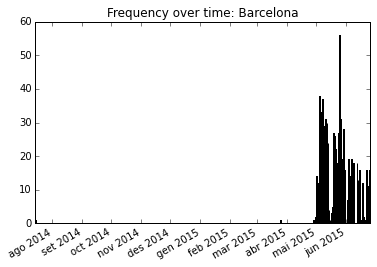

In [1093]:


def print_histogram_city(place,x,y):
    #%matplotlib qt
    %matplotlib inline
    import datetime
    import random
    import matplotlib.pyplot as plt

    # make up some data
    plt.title("Frequency over time: "+place)
    # plot
    plt.bar(x,y)
    # beautify the x-labels
    plt.gcf().autofmt_xdate()

    plt.show()
print_histogram_city('Barcelona',lst_table_n_bcn,lst_table_v_bcn)

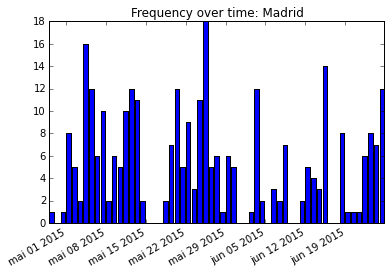

In [1094]:
print_histogram_city('Madrid',lst_table_n_mad,lst_table_v_mad)

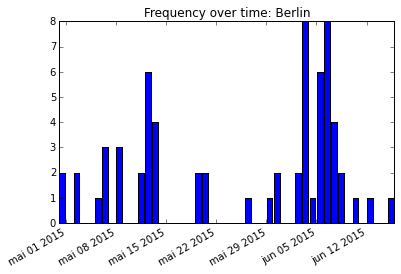

In [1095]:
print_histogram_city('Berlin',lst_table_n_ber,lst_table_v_ber)

# Apply a clustering algorithm

If a group of locations are relatively near, I define an algorithm in order to print one item instead of all.

In [872]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
clusters = {}

def getCentroid(points):
    n = points.shape[0]
    sum_lon = np.sum(points[:, 1])
    sum_lat = np.sum(points[:, 0])
    return (sum_lon/n, sum_lat/n)

def getNearestPoint(set_of_points, point_of_reference):
    closest_point = None
    closest_dist = None
    for point in set_of_points:
        point = (point[1], point[0])
        dist = great_circle(point_of_reference, point).meters
        if (closest_dist is None) or (dist < closest_dist):
            closest_point = point
            closest_dist = dist
    return closest_point

def print_cluster_test(df,rs):
    plt.figure(figsize=(10, 6), dpi=100)
    rs_scatter = plt.scatter(rs['lon'], rs['lat'], c='g', alpha=.4, s=150)
    df_scatter = plt.scatter(df['lon'], df['lat'], c='k', alpha=.5, s=5)
    plt.title('Dades originals vs dades aplicant DBSCAN')
    plt.legend((df_scatter, rs_scatter), ('Dades Originals', 'Dades DBSCAN'), loc='upper left')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

final_cluster_list = []
def apply_clustering(a,distance_eps,show=False):
    final_cluster_list = []
    rs = []
    if len(a)!=0:
        for itm in a:
            if isinstance(itm[1], basestring):
                rs.append([float(itm[1]),float(itm[2])])
            else:
                rs.append([itm[1],itm[2]])
        df = pd.DataFrame(rs)
        df.columns=['lat','lon']
        coordinates = pd.DataFrame.as_matrix(df)
        db = DBSCAN(eps=distance_eps, min_samples=1).fit(coordinates)
        labels = db.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        clusters = pd.Series([coordinates[labels == i] for i in xrange(num_clusters)])
        print('Number of clusters: %d' % num_clusters)
        res_list = []
        lon = []
        lat = []
        for i, cluster in clusters.iteritems():
            if len(cluster) < 3:
                representative_point = (cluster[0][1], cluster[0][0])
            else:
                representative_point = getNearestPoint(cluster, getCentroid(cluster))
            lon.append(representative_point[0])
            lat.append(representative_point[1])
            #ciutat = get_city_by_coordinates(representative_point[1],representative_point[0])
            final_cluster_list.append([representative_point[1],representative_point[0],len(cluster)])
            
            res_list.append([representative_point[1],representative_point[0],len(cluster)])
        rs = pd.DataFrame({'lon':lon, 'lat':lat})
        #print "Final cluster:",final_cluster_list
        if(show):
            print_cluster_test(df,rs)
    else:
        return None
    return res_list
    


###Test the clustering algorithm by showing the results of an example

I consider five towns: Riba-roja d'Ebre, Flix, Amposta, Ascó and Garcia. All those towns are relatively near. The clustering algorithm should group the nearest towns.

In [864]:
def apply_get_city_test(clustering = True):
    db = get_db_news()
    noticies = db.noticies.find()
    ciutats_mon = json.loads(open("JSON/world_cities_coord.json").read())
    db2 = get_db_ciutats()
    res_dict = {}
    i = 0
    ciutats_trobades = ["Riba-roja d'Ebre","Flix","Amposta","Ascó","Garcia"]
    inici_noticia=i
    for ciut in ciutats_trobades:
        print ciut
        pobles = db2.ciutats.find({'name':ciut})
        if pobles.count()>0: 
            for poble in pobles:
                coord = [poble['lat'],poble['lon']]
        else:
            coord = ciutats_mon.get(ciut.decode('utf-8'))
        if(coord != None):
            res_dict[i]=[ciut,coord[0],coord[1]]
            fi_noticia=i
        i += 1
    if(clustering):
        #aplicar aquí clustering, res_dict conté les coordenades
        list_analyse=[]
        for elm_num in range(inici_noticia,fi_noticia+1):
            list_analyse.append(res_dict[elm_num])
        #as the distance eps gets bigger, less clusters are created
        print res_dict
        print apply_clustering(list_analyse,0.2,True)


In [865]:
apply_get_city_test()
print final_cluster_list

Riba-roja d'Ebre
Flix
Amposta
Ascó
Garcia
{0: ["Riba-roja d'Ebre", 41.25223973517761, 0.4887686022477724], 1: ['Flix', 41.57338202351654, 1.4982540556219377], 2: ['Amposta', 40.67859192591427, 0.535280705955623], 3: ['Asc\xc3\xb3', 41.19905711492307, 0.5707004425811775], 4: ['Garcia', 41.266342872920546, 1.0277976921911862]}
Number of clusters: 4
[[41.266342872920546, 1.0277976921911862], [41.252239735177611, 0.48876860224777241], [40.678591925914269, 0.53528070595562305], [41.573382023516537, 1.4982540556219377]]
[[41.266342872920546, 1.0277976921911862, 1], [41.252239735177611, 0.48876860224777241, 2], [40.678591925914269, 0.53528070595562305, 1], [41.573382023516537, 1.4982540556219377, 1]]


##Let's apply the clustering algorithm to the results found in the database

Assuming that the coordinates and towns found are in the lst variable, I apply the algorithm to it

In [887]:
import collections
#specify the distance EPS
distance_eps = 0.05

print "Total references found:",len(lst)
unique_set = set([a[0] for a in lst])
print "Total unique locations:",len(unique_set)
counter= collections.Counter(total_set)
final_cluster_list=apply_clustering(lst,distance_eps)
#print "Final set:",final_cluster_list
print counter

Total references found: 5225
Total unique locations: 1100
Number of clusters: 326
Counter({'Barcelona': 826, 'Madrid': 298, 'Manresa': 148, 'Lleida': 116, 'Girona': 113, 'Tarragona': 82, 'Berga': 76, 'Badalona': 73, 'Berl\xc3\xadn': 65, 'Sabadell': 61, 'Par\xc3\xads': 58, 'Nova York': 52, 'Terrassa': 48, 'Sevilla': 43, 'Londres': 42, 'Reus': 42, 'Munic': 38, 'Matar\xc3\xb3': 37, 'Vic': 33, 'Roma': 29, 'X\xc3\xa0tiva': 28, 'Puigcerd\xc3\xa0': 28, 'Bilbao': 25, 'Val\xc3\xa8ncia': 25, 'Igualada': 22, 'York': 20, 'Santa Coloma de Gramenet': 20, 'Santpedor': 20, 'M\xc3\xa8xic': 20, 'Saragossa': 20, 'Solsona': 19, 'Sitges': 19, 'Washington': 19, 'Hospitalet de Llobregat': 19, 'Canes': 18, 'Granollers': 17, 'M\xc3\xa0laga': 17, 'Sant Vicen\xc3\xa7 dels Horts': 16, 'Martorell': 16, 'Figueres': 16, 'Cardona': 15, 'Castelldefels': 15, 'Alacant': 15, 'Seria': 14, 'Rub\xc3\xad': 14, 'Valencia': 14, 'Valls': 13, 'Buenos Aires': 13, 'Montmel\xc3\xb3': 12, 'Tortosa': 12, 'Sant Cugat del Vall\xc3\xa8s

In [915]:
from operator import itemgetter
import numpy as np
import pandas
lst_table = []
lst_table_n = []
lst_table_v = []
for a in counter.keys():
    lst_table_n.append(a)
for a in counter.values():
    lst_table_v.append(a)
for a in range(len(lst_table_n)):
    lst_table.append([lst_table_n[a],lst_table_v[a]])
lst_table=sorted(lst_table, key=itemgetter(1),reverse=True)

data = np.array(lst_table)
pandas.DataFrame(data,columns=["Location","Frequency"])

,Location,Frequency
0,Barcelona,826
1,Madrid,298
2,Manresa,148
3,Lleida,116
4,Girona,113
5,Tarragona,82
6,Berga,76
7,Badalona,73
8,Berlín,65
9,Sabadell,61


##Save the clustering results to a file

In [885]:
# save results using clustering to a list
#apply_get_city()
print len(final_cluster_list)
lst_cluster = []
for itm in tqdm(range(len(final_cluster_list))):
    lst_cluster.append(final_cluster_list[itm])
print 'Process finished!'
print 'Saving file'
# save all the results to a csv
from bson import json_util
with open('CSV/found_cities_cluster005.csv', 'wb') as f:
    w = csv.writer(f,delimiter=',')
    for a in range(len(lst_cluster)):
        w.writerow(lst_cluster[a])
print 'Saved'

326
Process finished!
Saving file
Saved


# First steps by creating a city names corrector

###I will try to create a corrector, that will look up the words to correct in the train set. This would be better if I had a file with the probabilities of appearances of each city.

In [101]:
#corrector
import re, collections

def words(text): 
    return re.findall('[a-z]+', text.lower()) 

def train(features):
    model = collections.defaultdict(lambda: 1)
    for f in features:
        model[f] += 1
    return model

#NWORDS = train(words(file('big.txt').read()))
#NWORDS = train(words(file('all_city_names.txt').read()))
NWORDS = train(file('all_city_names.txt').readlines())
dataset1 = []
for w in file('all_city_names.txt').readlines():
    dataset1.append(w.split(',')[0].replace('\n',''))

alphabet = "abcçdefghijklmnopqrstuvwxyzàèéiòóúí'"

def edits1(word):
   splits     = [(word[:i], word[i:]) for i in range(len(word) + 1)]
   deletes    = [a + b[1:] for a, b in splits if b]
   transposes = [a + b[1] + b[0] + b[2:] for a, b in splits if len(b)>1]
   replaces   = [a + c + b[1:] for a, b in splits for c in alphabet if b]
   inserts    = [a + c + b     for a, b in splits for c in alphabet]
   return set(deletes + transposes + replaces + inserts)

def known_edits2(word):
    return set(e2 for e1 in edits1(word) for e2 in edits1(e1) if e2 in NWORDS)

#def known(words): return set(w for w in words if w in NWORDS)
def known(words): return set(w for w in words if w in dataset1)

def correct(word):
    candidates = known([word]) or known(edits1(word)) or known_edits2(word) or [word]
    return max(candidates, key=NWORDS.get)

In [45]:
if "Móra d'Ebre" in edits1("Móra l'Ebre"):
    print 'OK'
else:
    print 'NOPE'

OK


In [46]:
correct('Castellbsbal'), correct('Riba-roja d’Ebre'), correct("Móra l'Ebre"), correct('Salt Cugat del Vallès')

('Castellbisbal',
 'Riba-roja d\xe2\x80\x99Ebre',
 "M\xc3\xb3ra d'Ebre",
 'Sant Cugat del Vall\xc3\xa8s')

#4.- Show the results from CartoDB

After having uploaded and after given the correct format to all fields and views to CartoDB, I show downwards the maps obtained.

##Map with all appearances in news DB

In [1103]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='https://alsolanes.cartodb.com/viz/9db1d1e0-1417-11e5-998b-0e0c41326911/embed_map' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")

#Map with different layers to see a general map of all appearances, a map with the results split by Journal, and map showing the evolution in time

By default CartoDB and many other mapping systems, use an own algorithm to cluster the results, this view will not show the results from the DBScan algorithm yet.

In [1107]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='https://alsolanes.cartodb.com/viz/76172892-1bf6-11e5-b8d9-0e018d66dc29/embed_map' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")

#Heat map with the evolution of appearances in time

In [1108]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='https://alsolanes.cartodb.com/viz/ea8ad2c2-1bf7-11e5-bade-0e853d047bba/embed_map' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")


##Map with all appearances in news DB using DBScan

Four layers are able to choose, each one refers to a different value Epsilon in the DBScan algorithm. The four values are 0.05, 0.1, 0.2 and 0.8.
As the Epsilon gets lower, the higher amount of clusters are shown, and each cluster contains more items in it. As the Epsilon gets bigger, the fewer amount of clusters are created, so each cluster contains fewer items in it.

In [1101]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='https://alsolanes.cartodb.com/viz/df823238-1bcc-11e5-97f8-0e0c41326911/embed_map' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")